# Bank Churn Custormer Prediction

## 1. Data Preprocessing

### 1.1 Pakcage Loading and Understanding Data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
train_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
train_df.sort_values(by = 'CustomerId')

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.dtypes

### 1.2 Data Visulization

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

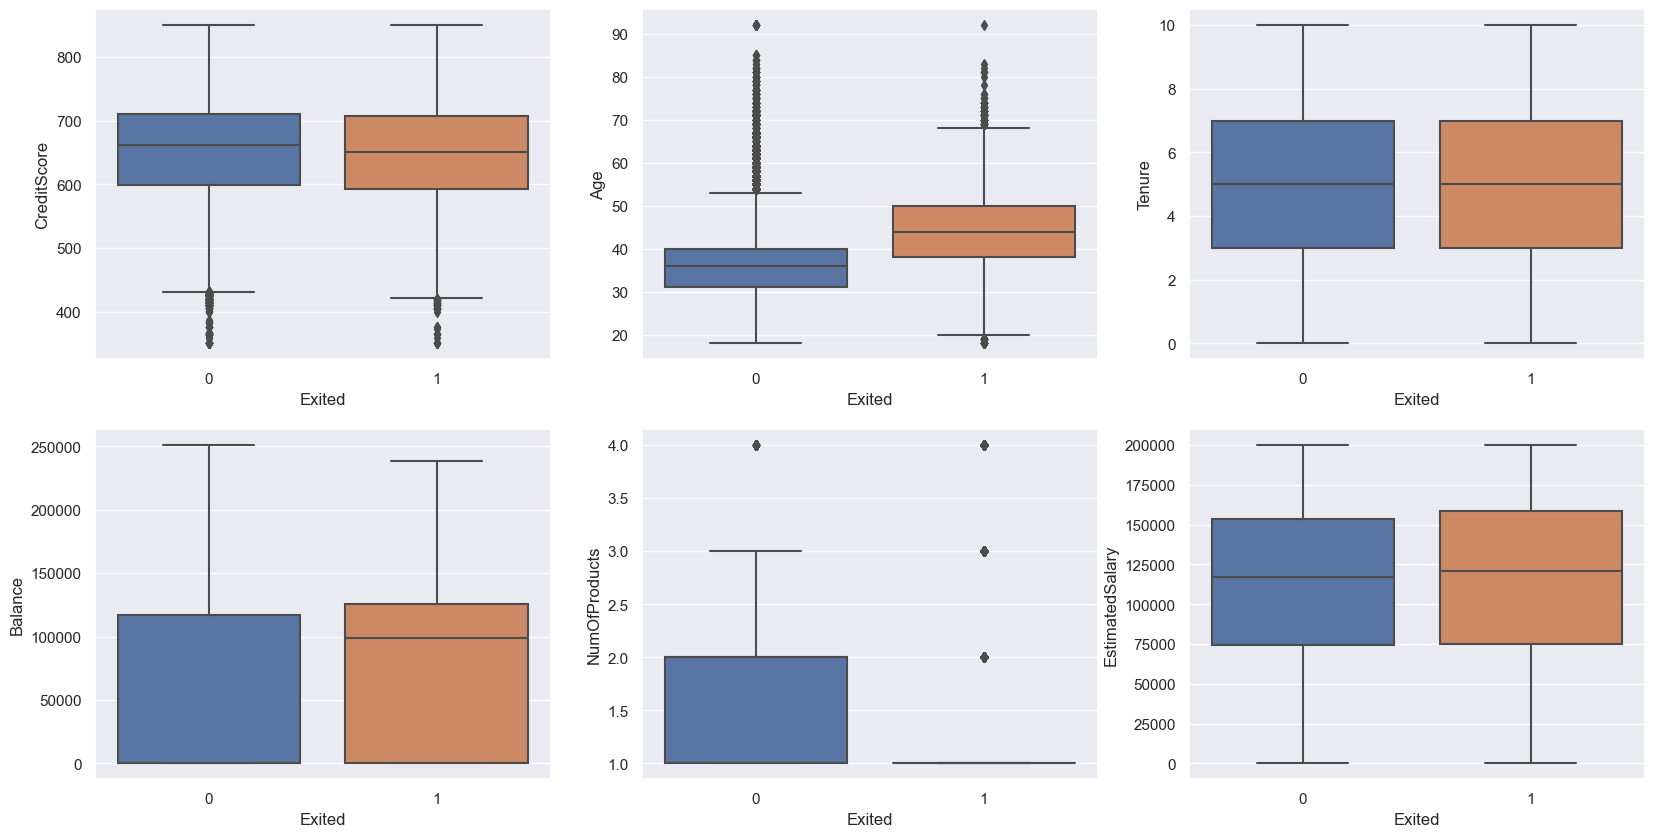

In [24]:
_,axss = plt.subplots(2,3, figsize = [20,10])
sns.boxplot(x='Exited', y = 'CreditScore', data = train_df, ax=axss[0][0])
sns.boxplot(x='Exited', y = 'Age', data = train_df, ax=axss[0][1])
sns.boxplot(x='Exited', y = 'Tenure', data = train_df, ax=axss[0][2])
sns.boxplot(x='Exited', y = 'Balance', data = train_df, ax=axss[1][0])
sns.boxplot(x='Exited', y = 'NumOfProducts', data = train_df, ax=axss[1][1])
sns.boxplot(x='Exited', y = 'EstimatedSalary', data = train_df, ax=axss[1][2])

<Axes: xlabel='Exited', ylabel='count'>

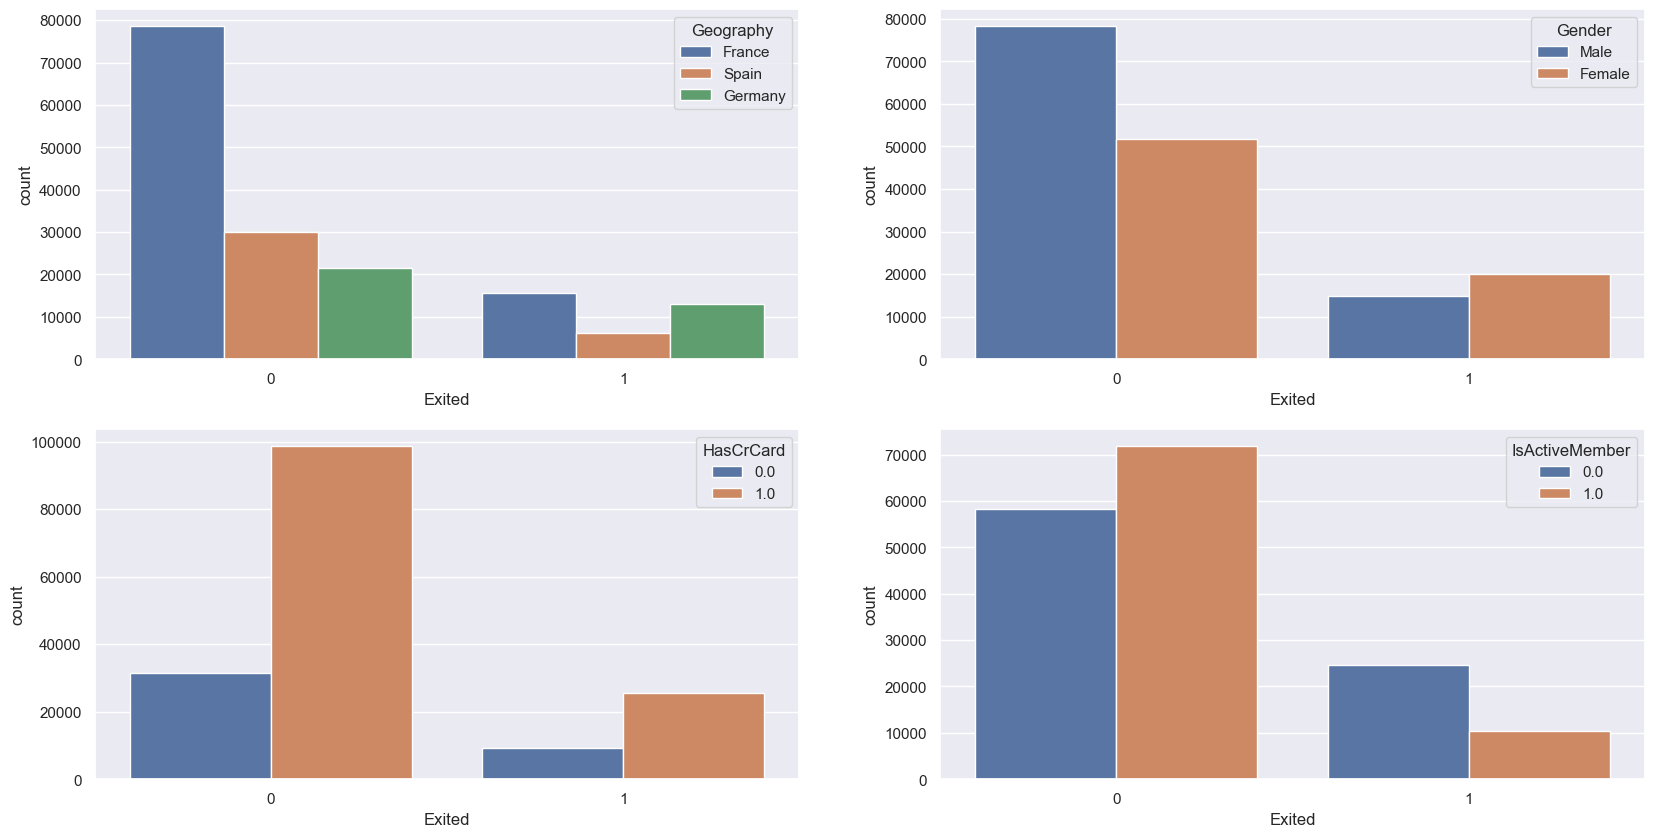

In [25]:
_,axss = plt.subplots(2,2, figsize = [20,10])
sns.countplot(x='Exited', hue ='Geography', data=train_df, ax=axss[0][0])
sns.countplot(x='Exited', hue ='Gender', data=train_df, ax=axss[0][1])
sns.countplot(x='Exited', hue ='HasCrCard', data=train_df, ax=axss[1][0])
sns.countplot(x='Exited', hue ='IsActiveMember', data=train_df, ax=axss[1][1])

In [26]:
sns.set()

numCol = []
for col in train_df:
    if train_df[col].dtype == float or train_df[col].dtype == int:
        numCol.append(col)
corr = train_df[numCol].corr()

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'CustomerId'),
 Text(2.5, 0, 'CreditScore'),
 Text(3.5, 0, 'Age'),
 Text(4.5, 0, 'Tenure'),
 Text(5.5, 0, 'Balance'),
 Text(6.5, 0, 'NumOfProducts'),
 Text(7.5, 0, 'HasCrCard'),
 Text(8.5, 0, 'IsActiveMember'),
 Text(9.5, 0, 'EstimatedSalary'),
 Text(10.5, 0, 'Exited')]

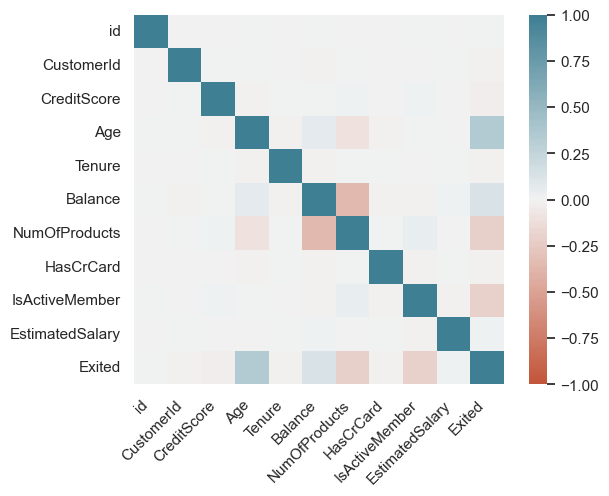

In [27]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [28]:
corr_score = train_df[numCol].corr()
corr_score

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,1.000000,-0.000387,-0.001201,0.004039,-0.002560,0.000606,-0.000094,-0.004706,0.000418,-0.001552,0.002512
CustomerId,-0.000387,1.000000,0.007364,0.002696,-0.001252,-0.008348,0.004380,-0.005469,-0.002934,0.002891,-0.009947
CreditScore,-0.001201,0.007364,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Age,0.004039,0.002696,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,-0.002560,-0.001252,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.000606,-0.008348,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,-0.000094,0.004380,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.004706,-0.005469,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.000418,-0.002934,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001552,0.002891,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827


<Axes: >

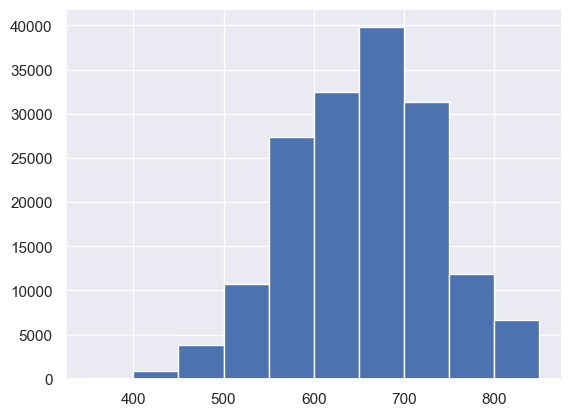

In [29]:
train_df['CreditScore'].hist()

<Axes: >

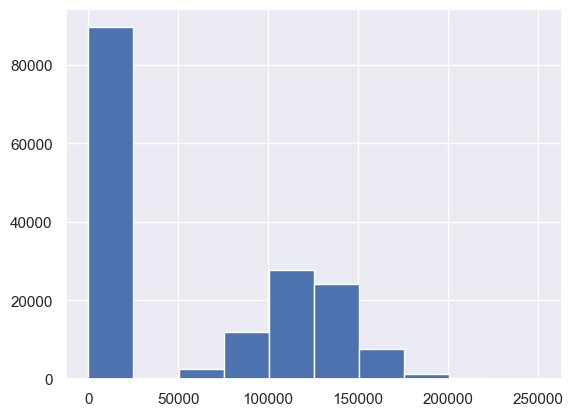

In [33]:
train_df['Balance'].hist()

## 2. Data Processing

In [ ]:
to_drop = ['id','CustomerId','Surname','Exited']
use_col = ['Age','Balance','NumOfProducts','Geography','Gender','HasCrCard','IsActiveMember']
X = train_df[use_col]
y = train_df['Exited']
test1 = test_df[use_col]
cat_col = X.columns[X.dtypes == 'object']
num_col = ['Age', 'Balance', 'NumOfProducts']

# Extreme value cut-off
X['Balance'] = X['Balance'].apply(lambda x: 200000 if x > 200000 else x)
test1['Balance'] = test1['Balance'].apply(lambda x: 200000 if x > 200000 else x)

In [47]:
from sklearn import model_selection
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25,
                                                                   random_state= 21, stratify = y)
print('train data has '+str(X_train.shape[0])+ ' with '+str(X_train.shape[1])+' features')
print('test data has '+str(X_test.shape[0])+ ' with '+str(X_test.shape[1])+' features')

train data has 123775 with 7 features
test data has 41259 with 7 features


In [48]:
from sklearn.preprocessing import OneHotEncoder

def one(df,enc,cat):
    t = pd.DataFrame(enc.transform(df[cat]).toarray(), columns = enc.get_feature_names_out(cat))
    return pd.concat([df.reset_index(drop=True), t], axis=1).drop(cat, axis=1)

cat = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[cat])

X_train = one(X_train, enc_ohe, cat)
X_test = one(X_test, enc_ohe, cat)
test1 = one(test1, enc_ohe, cat)

from sklearn.preprocessing import OrdinalEncoder

cat = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[cat])

X_train[cat] = enc_oe.transform(X_train[cat])
X_test[cat]= enc_oe.transform(X_test[cat])
test1[cat] = enc_oe.transform(test1[cat])
test1.head(3)

,Age,Balance,NumOfProducts,Gender,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain
0,23.0,0.0,2,0.0,0.0,1.0,1.0,0.0,0.0
1,46.0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0
2,34.0,0.0,2,0.0,1.0,0.0,1.0,0.0,0.0


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_col])

X_train[num_col] = scaler.transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])
test1[num_col] =scaler.transform(test1[num_col])

## 3. Model Selection and Model Evaluation

### 3.1 Random Forest

In [41]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#logistic = LogisticRegression()
#KNN = KNeighborsClassifier()
RF = RandomForestClassifier()

In [62]:
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(gs):
    print(("Best score: " + str(gs.best_score_)))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))
        
# Possible hyperparamter options for Random Forest
parameters = {
    'n_estimators' : [85,90,95,100,110],
    'max_depth': [9,10,11]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

print_grid_search_metrics(Grid_RF)
best_RF_model = Grid_RF.best_estimator_

Best score: 0.8646334073924459
Best parameters set:
max_depth:9
n_estimators:110


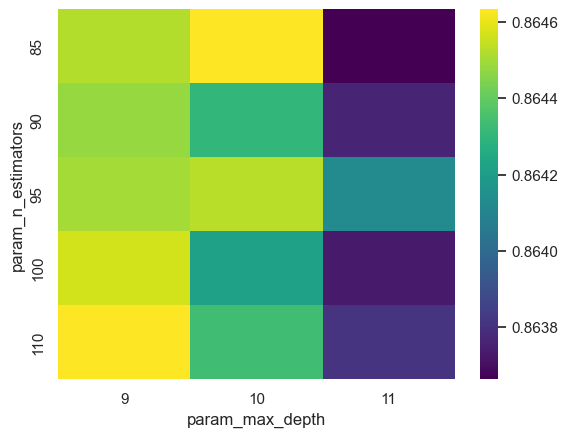

In [63]:
RF_models = pd.DataFrame(Grid_RF.cv_results_)
res = (RF_models.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score'))
_ = sns.heatmap(res, cmap='viridis')

### 3.2 Evaluation

/var/folders/0g/1v_dx9s92_d_fs88qdtmgffh0000gn/T/ipykernel_55756/1325802999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testXG['Exited'] = pd.DataFrame(yb)


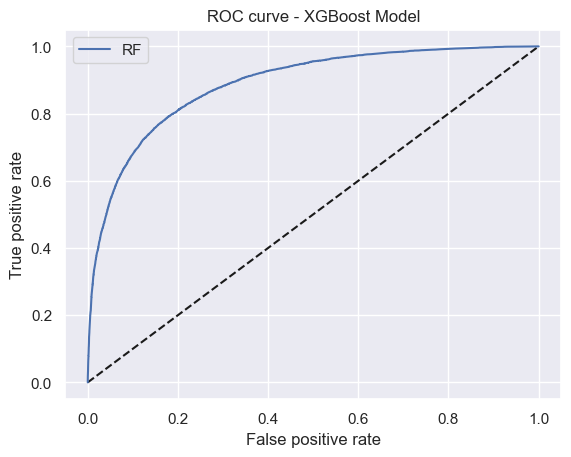

In [67]:
from sklearn import metrics
from sklearn.metrics import roc_curve
yb = Grid_RF.predict_proba(test1)[:, 1]
testRF = test_df[['id']]
testRF['Exited'] = pd.DataFrame(yb)
testRF.to_csv('RFresultsAUC.csv',index=False)

y_pred = Grid_RF.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresh = roc_curve(y_test, y_pred)

Grid_RF.predict_proba(X_test)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - XGBoost Model')
plt.legend(loc='best')
plt.show()

In [68]:
# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8878150176120932

## 4. Future Discussion

### Feature Importance

In [71]:
X_RF = X.copy()
X_RF.head(1)

,Age,Balance,NumOfProducts,Geography,Gender,HasCrCard,IsActiveMember
0,33.0,0.0,2,France,Male,1.0,0.0


In [72]:
X_RF = X.copy()

X_RF = one(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

,Age,Balance,NumOfProducts,Gender,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain
0,33.0,0.00,2,1.0,1.0,0.0,1.0,0.0,0.0
1,33.0,0.00,2,1.0,1.0,1.0,1.0,0.0,0.0
2,40.0,0.00,2,1.0,1.0,0.0,1.0,0.0,0.0
3,34.0,148882.54,1,1.0,1.0,1.0,1.0,0.0,0.0
4,33.0,0.00,2,1.0,1.0,1.0,0.0,0.0,1.0


In [73]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Balance : 0.4145
Age : 0.2752
NumOfProducts : 0.1835
IsActiveMember : 0.0605
Geography_Germany : 0.0301
Gender : 0.0207
HasCrCard : 0.0069


### some thoughts learned from data:
1. People with lower balance are more likely to exit.
       -- Saving bonous promotion to keep customers
       -- launch some new financial products. (combined with num of products)
       
3. Elder people are more likely to churn. -- Provide retention offer for elder people